<a href="https://colab.research.google.com/github/nandakishan-jinu/Stock-price-analysis/blob/main/stock_final(time_series_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# Dataset Cleaning Function

def clean_stock_data(file_path):
    # Read data with proper formatting
    df = pd.read_csv(file_path, skiprows=2)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

    # Convert to datetime and set index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Convert numeric columns
    numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Handle missing values
    df = df.dropna()
    df = df[~df.index.duplicated(keep='first')]

    return df

In [5]:
# Time Series Analysis Function

def time_series_analysis(df, window=7):

    # Create technical features
    df['SMA_7'] = df['Close'].rolling(window=window).mean()
    df['EMA_14'] = df['Close'].ewm(span=14).mean()

    # Create lag features
    for lag in [1, 2, 3]:
        df[f'Lag_{lag}'] = df['Close'].shift(lag)

    # Create target variable (1 if price increases, 0 otherwise)
    df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

    # Drop remaining NA values from feature creation
    df = df.dropna()

    return df

In [6]:
# Predictive Modeling Function

def train_predictive_model(df, test_size=0.2):

    # Prepare features and target
    features = df.drop(['Target', 'Close'], axis=1).columns
    X = df[features]
    y = df['Target']

    # Time-based train-test split
    split_idx = int(len(df) * (1 - test_size))
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    print(f"Model F1 Score: {f1:.4f}")

    return model, scaler, features

In [7]:
# Prediction Plotting

def plot_predictions(df, model, scaler, features):


    # Generate predictions
    X = scaler.transform(df[features])
    df['Predicted'] = model.predict(X)

    # Calculate predicted price changes
    df['Predicted_Close'] = df['Close'] * (1 + df['Predicted'] * 0.01)

    # Plot results
    plt.figure(figsize=(14, 6))
    plt.plot(df['Close'], label='Actual Close Price')
    plt.plot(df['Predicted_Close'], label='Predicted Trend', alpha=0.7)
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [8]:
def plot_model_performance(y_true, y_pred):
    #Plots confusion matrix and classification report

    plt.figure(figsize=(12, 5))

    # Confusion Matrix
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Feature Importance
    plt.subplot(1, 2, 2)
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

Model F1 Score: 0.7407


<ipython-input-7-af3d671d3bab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted'] = model.predict(X)
<ipython-input-7-af3d671d3bab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Close'] = df['Close'] * (1 + df['Predicted'] * 0.01)


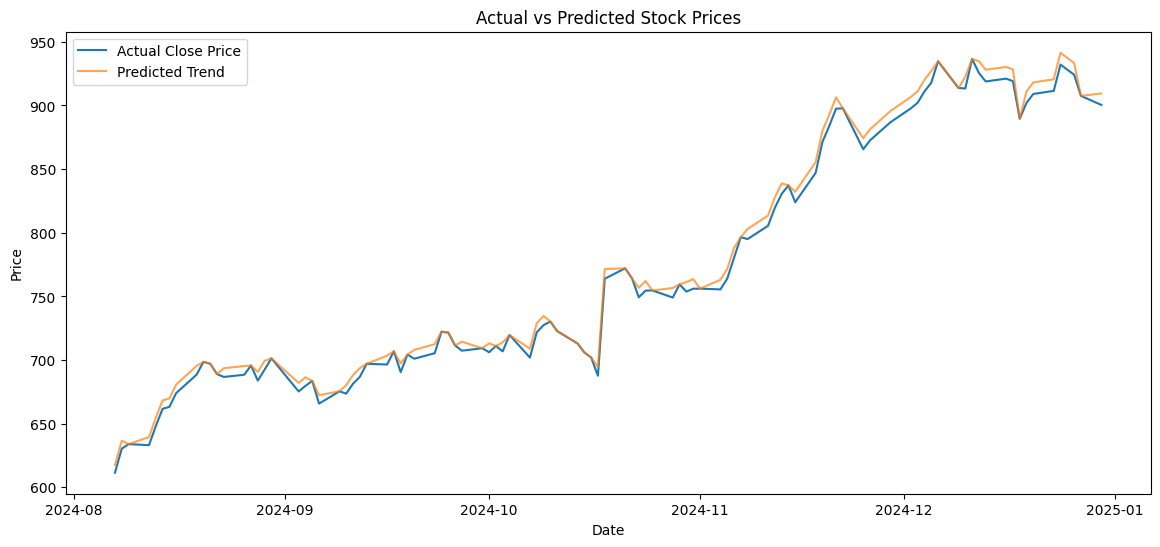

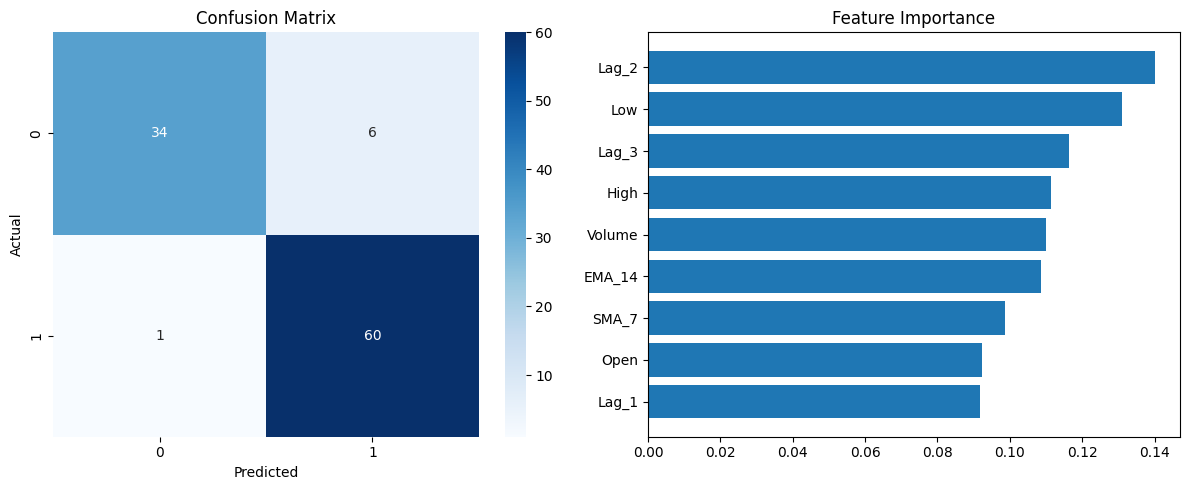

In [12]:
# Main Execution

if __name__ == "__main__":
    # Load and clean data
    df = clean_stock_data('/content/drive/MyDrive/Netflix_stock_data.csv')

    # Perform time series analysis
    processed_df = time_series_analysis(df)

    # Train predictive model
    model, scaler, features = train_predictive_model(processed_df)

    # Generate and plot predictions
    plot_predictions(processed_df, model, scaler, features)

     # For model performance plots
    preds = model.predict(scaler.transform(processed_df[features]))
    plot_model_performance(processed_df['Target'], preds)

Model F1 Score: 0.1667


<ipython-input-7-af3d671d3bab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted'] = model.predict(X)
<ipython-input-7-af3d671d3bab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Close'] = df['Close'] * (1 + df['Predicted'] * 0.01)


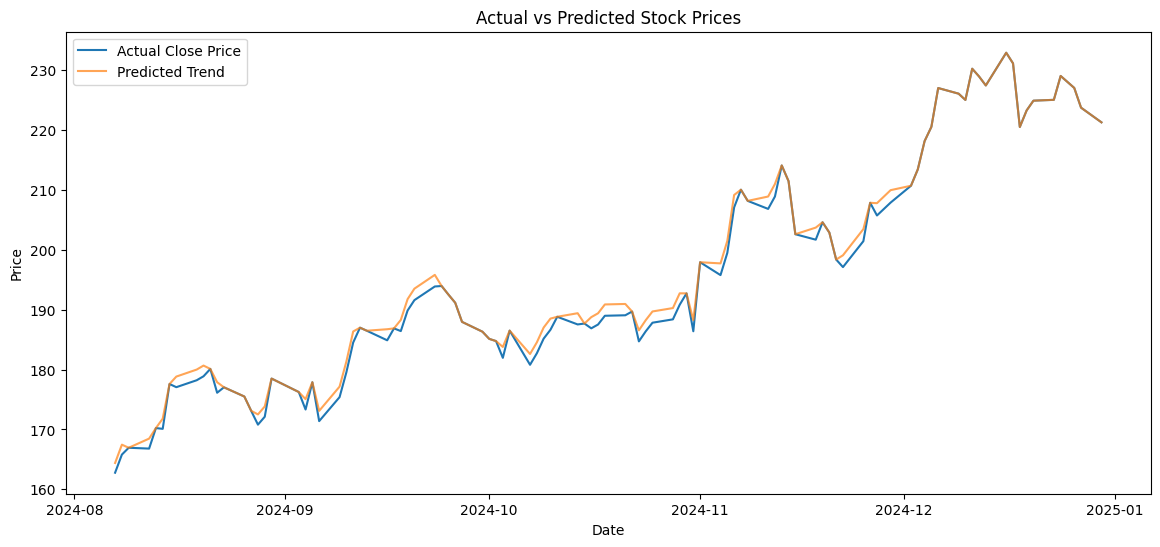

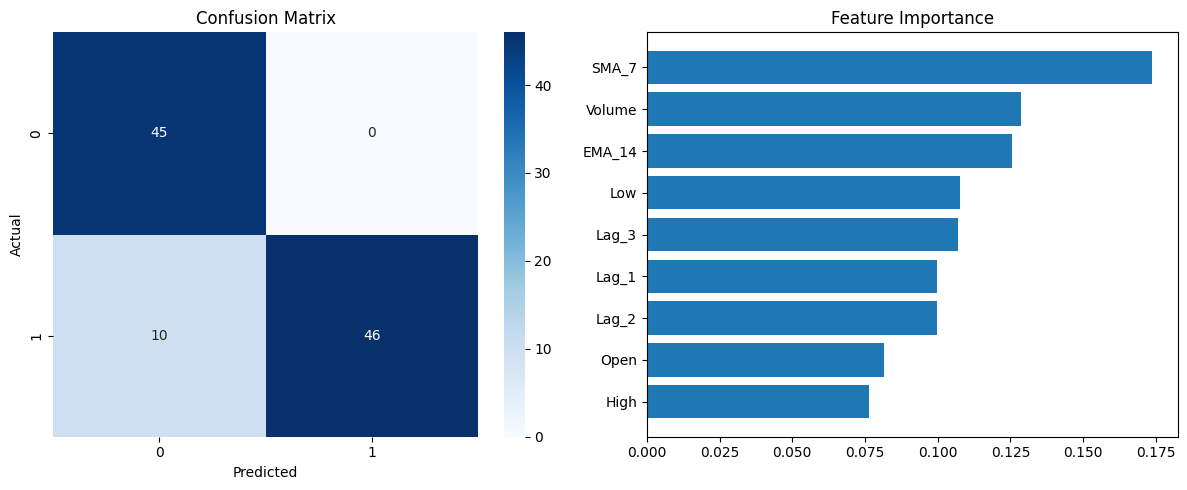

In [13]:
# Main Execution

if __name__ == "__main__":
    # Load and clean data
    df = clean_stock_data('/content/drive/MyDrive/Amazon_stock_data.csv')

    # Perform time series analysis
    processed_df = time_series_analysis(df)

    # Train predictive model
    model, scaler, features = train_predictive_model(processed_df)

    # Generate and plot predictions
    plot_predictions(processed_df, model, scaler, features)

    # For model performance plots
    preds = model.predict(scaler.transform(processed_df[features]))
    plot_model_performance(processed_df['Target'], preds)

Model F1 Score: 0.1250


<ipython-input-7-af3d671d3bab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted'] = model.predict(X)
<ipython-input-7-af3d671d3bab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Close'] = df['Close'] * (1 + df['Predicted'] * 0.01)


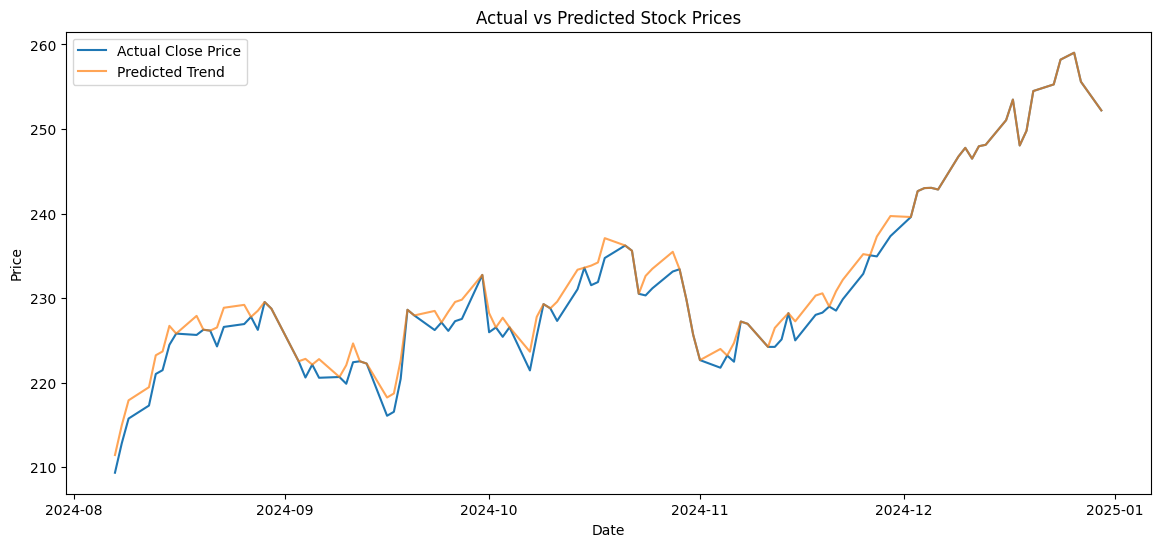

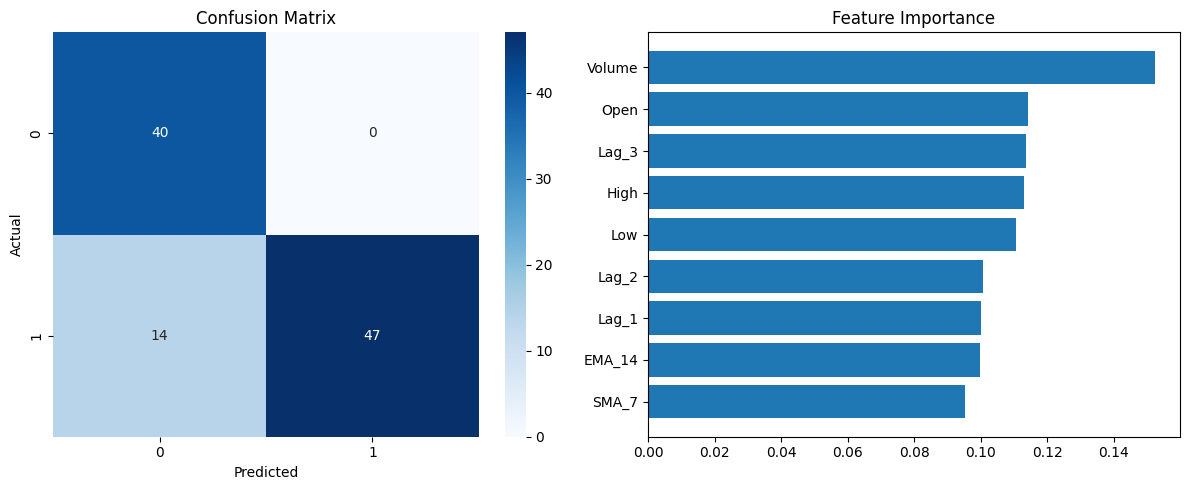

In [14]:
# Main Execution

if __name__ == "__main__":
    # Load and clean data
    df = clean_stock_data('/content/drive/MyDrive/Apple_stock_data.csv')

    # Perform time series analysis
    processed_df = time_series_analysis(df)

    # Train predictive model
    model, scaler, features = train_predictive_model(processed_df)

    # Generate and plot predictions
    plot_predictions(processed_df, model, scaler, features)

    # For model performance plots
    preds = model.predict(scaler.transform(processed_df[features]))
    plot_model_performance(processed_df['Target'], preds)

Model F1 Score: 0.5556


<ipython-input-7-af3d671d3bab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted'] = model.predict(X)
<ipython-input-7-af3d671d3bab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Close'] = df['Close'] * (1 + df['Predicted'] * 0.01)


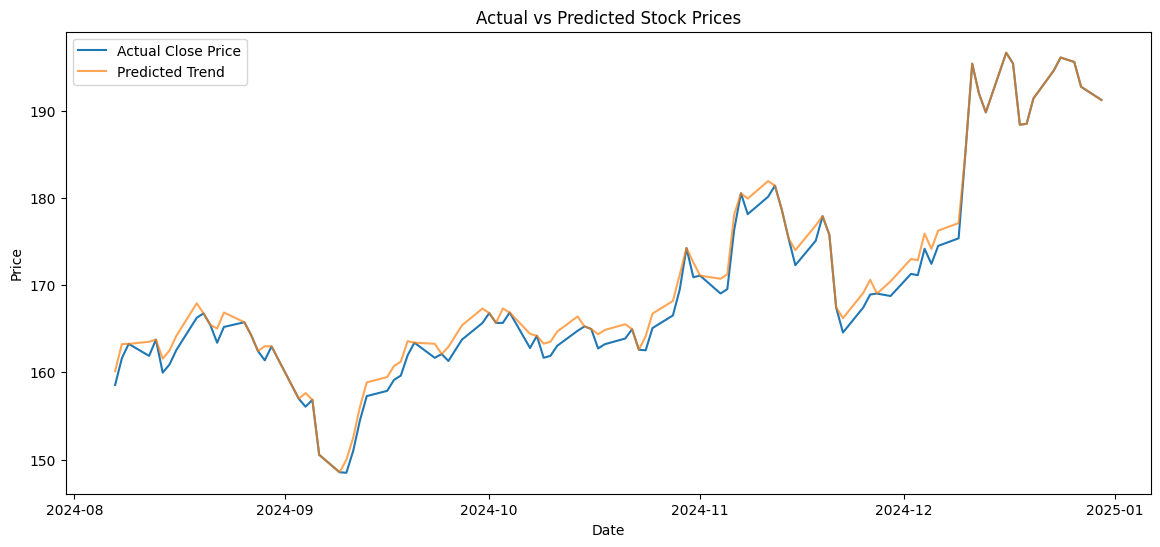

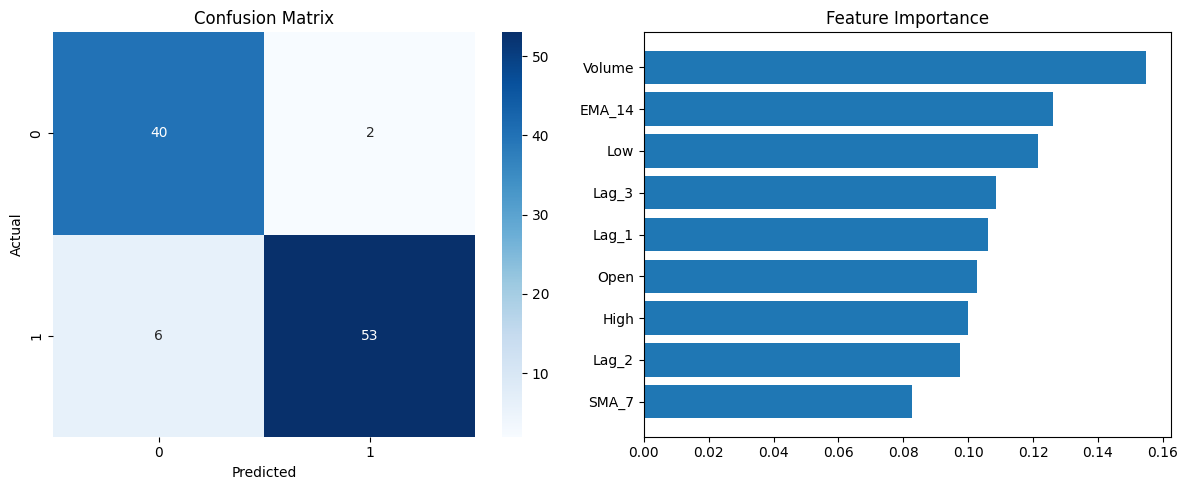

In [15]:
# Main Execution

if __name__ == "__main__":
    # Load and clean data
    df = clean_stock_data('/content/drive/MyDrive/GOOGLE_stock_data.csv')

    # Perform time series analysis
    processed_df = time_series_analysis(df)

    # Train predictive model
    model, scaler, features = train_predictive_model(processed_df)

    # Generate and plot predictions
    plot_predictions(processed_df, model, scaler, features)

    # For model performance plots
    preds = model.predict(scaler.transform(processed_df[features]))
    plot_model_performance(processed_df['Target'], preds)

Model F1 Score: 0.2000


<ipython-input-7-af3d671d3bab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted'] = model.predict(X)
<ipython-input-7-af3d671d3bab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Close'] = df['Close'] * (1 + df['Predicted'] * 0.01)


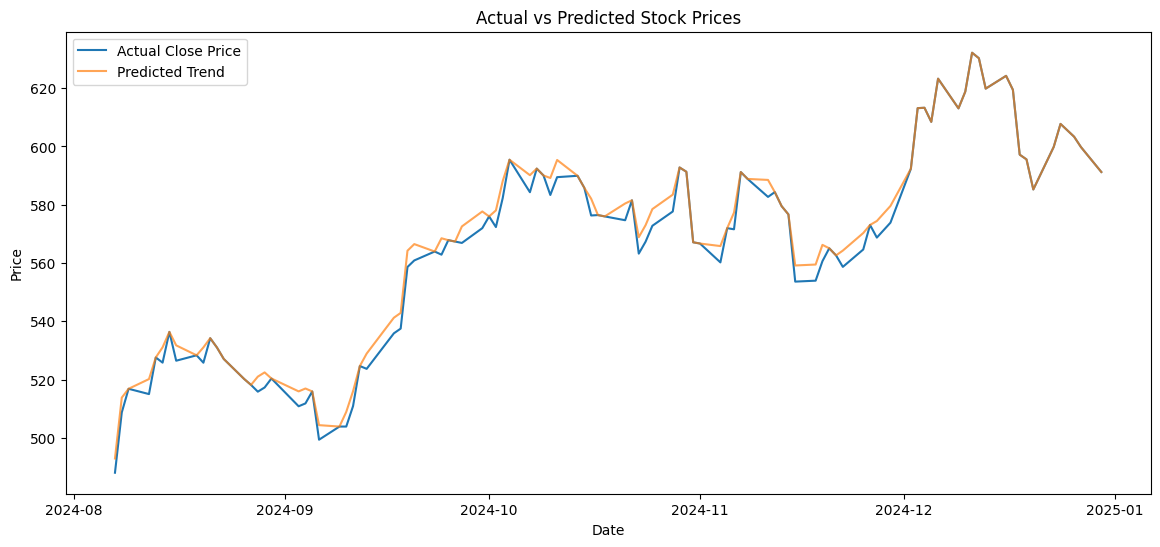

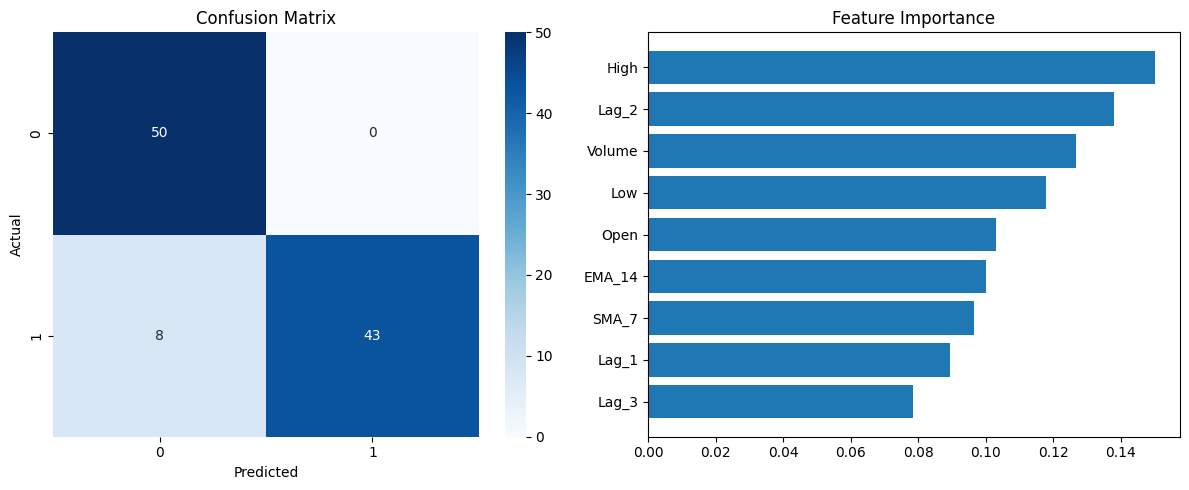

In [16]:
# Main Execution

if __name__ == "__main__":
    # Load and clean data
    df = clean_stock_data('/content/drive/MyDrive/META_stock_data.csv')

    # Perform time series analysis
    processed_df = time_series_analysis(df)

    # Train predictive model
    model, scaler, features = train_predictive_model(processed_df)

    # Generate and plot predictions
    plot_predictions(processed_df, model, scaler, features)

    # For model performance plots
    preds = model.predict(scaler.transform(processed_df[features]))
    plot_model_performance(processed_df['Target'], preds)

Model F1 Score: 0.3077


<ipython-input-7-af3d671d3bab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted'] = model.predict(X)
<ipython-input-7-af3d671d3bab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Close'] = df['Close'] * (1 + df['Predicted'] * 0.01)


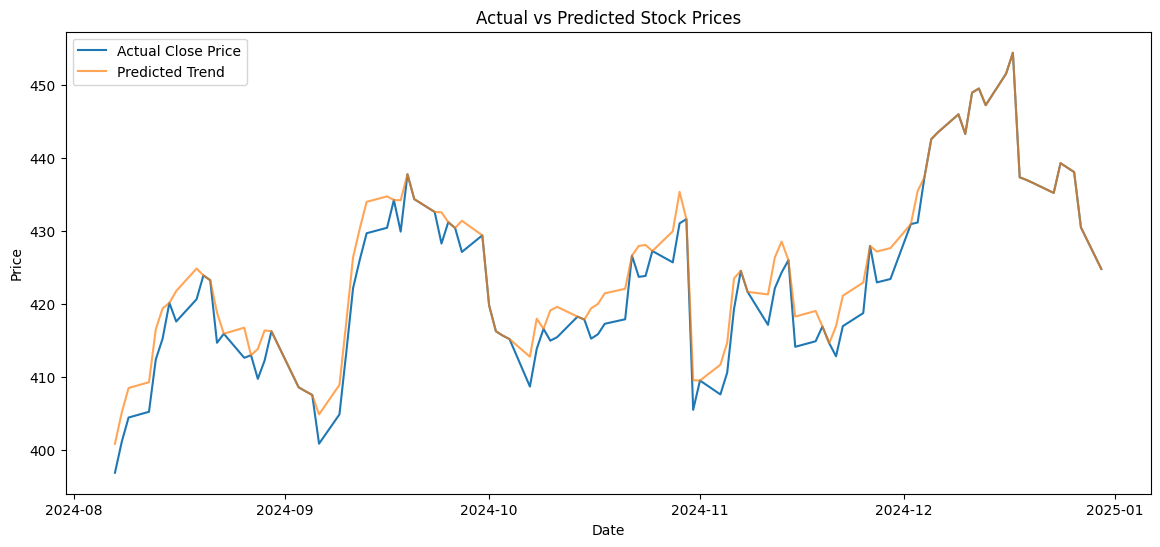

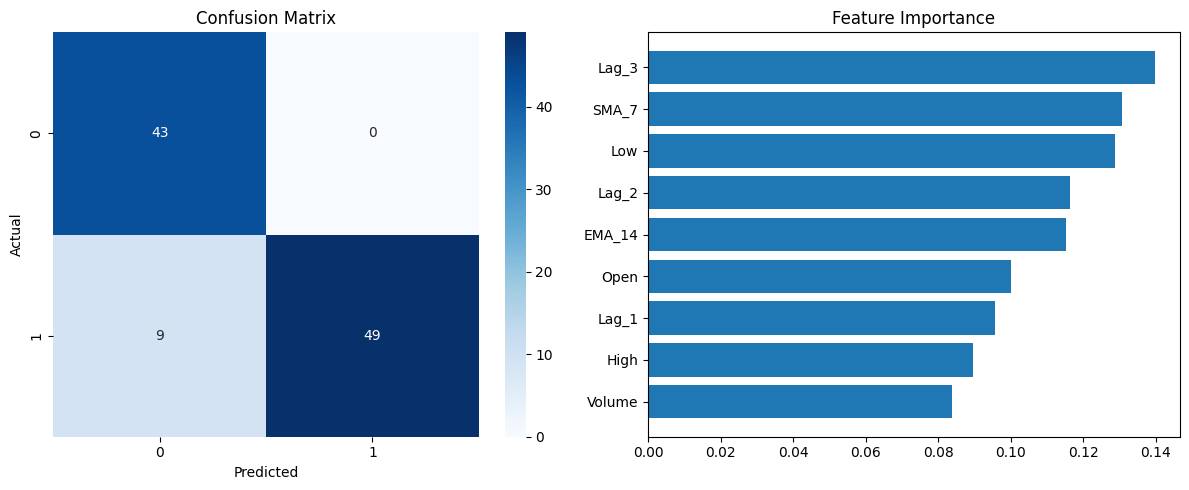

In [17]:
# Main Execution

if __name__ == "__main__":
    # Load and clean data
    df = clean_stock_data('/content/drive/MyDrive/Microsoft_stock_data.csv')

    # Perform time series analysis
    processed_df = time_series_analysis(df)

    # Train predictive model
    model, scaler, features = train_predictive_model(processed_df)

    # Generate and plot predictions
    plot_predictions(processed_df, model, scaler, features)

    # For model performance plots
    preds = model.predict(scaler.transform(processed_df[features]))
    plot_model_performance(processed_df['Target'], preds)